# Explore here

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [151]:
# Read.
df = pd.read_csv("../data/raw/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [152]:
# Informacion sobre columnas y valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [153]:
# Descripción.(aqui buscamos media y desviacion estandar)
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [154]:
# Valores faltantes
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


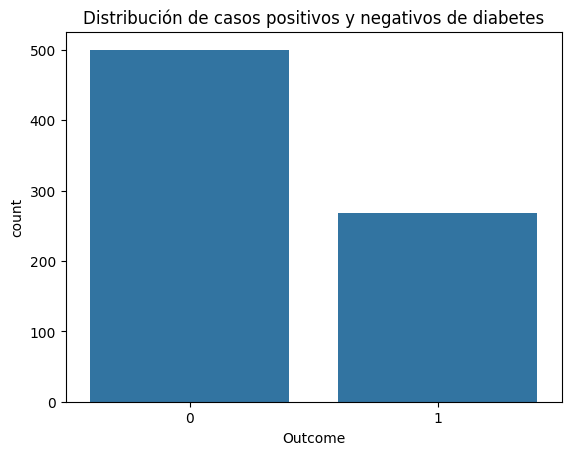

In [155]:
# Gráfico de la distribución de pacientes con y si ndiabetes.
sns.countplot(x=df["Outcome"])
plt.title("Distribución de casos positivos y negativos de diabetes")
plt.show()

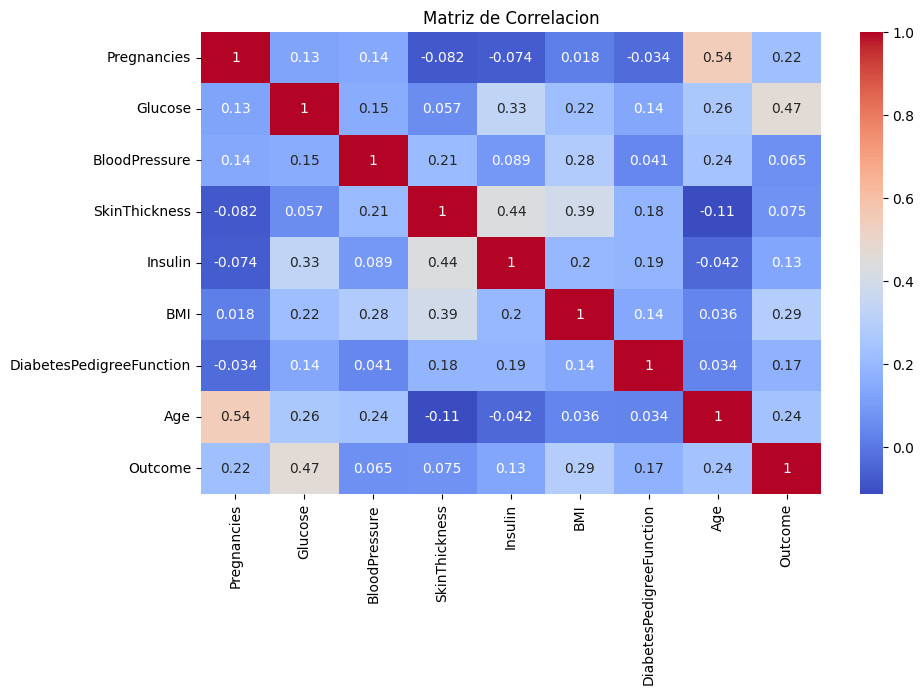

In [156]:
#Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')# sirve para ver la correlacion entre variables.
plt.title("Matriz de Correlacion")
plt.show()

In [ ]:
# Preprocesar.
X = df.drop('Outcome', axis=1) # separamos variables predictoras.
y = df["Outcome"] # Guardamos la variable objetivo (diabetes: 0 = no, 1 = sí).

# Train y test.
# Dividimos los datos en entrenamiento (80%) y prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f"Train: {X_train.shape}, Test: {X_test.shape}"

'Train: (614, 8), Test: (154, 8)'

In [158]:
# Escalar datos
scaler = StandardScaler() # Normaliza las variables para mejorar el rendimiento del modelo.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar Árbol de Decisión, definimos un árbol con una profundidad máxima de 4 niveles.
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
tree.fit(X_train_scaled, y_train)

# Entrenamos el modelo con los datos normalizados.
y_pred = tree.predict(X_test_scaled)

#Evaluacion del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Precisión general del modelo
print(f"Precision: {precision_score(y_test, y_pred):.4f}") # Mide la proporción de positivos reales entre los predichos como positivos
print(f"Recall: {recall_score(y_test, y_pred):.4f}") # Evalúa qué porcentaje de casos positivos fueron correctamente identificados
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}") # Combina precisión y recall para una evaluación equilibrada

Accuracy: 0.6948
Precision: 0.5588
Recall: 0.6909
F1 Score: 0.6179


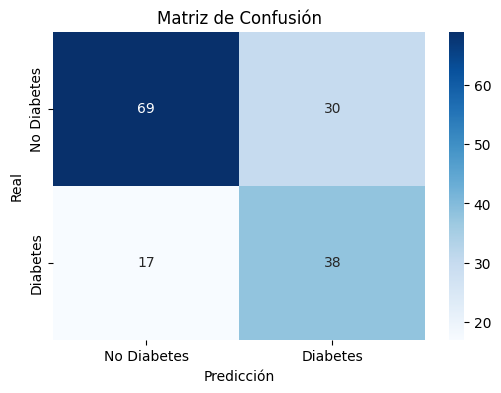

In [159]:
# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [160]:
# Optimización del modelo
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Buscamos los mejores hiperparámetros probando diferentes combinaciones
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train) # Ejecuta la búsqueda sobre los datos de entrenamiento

print("Mejores parámetros:", grid_search.best_params_) # Muestra los mejores valores encontrados

Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


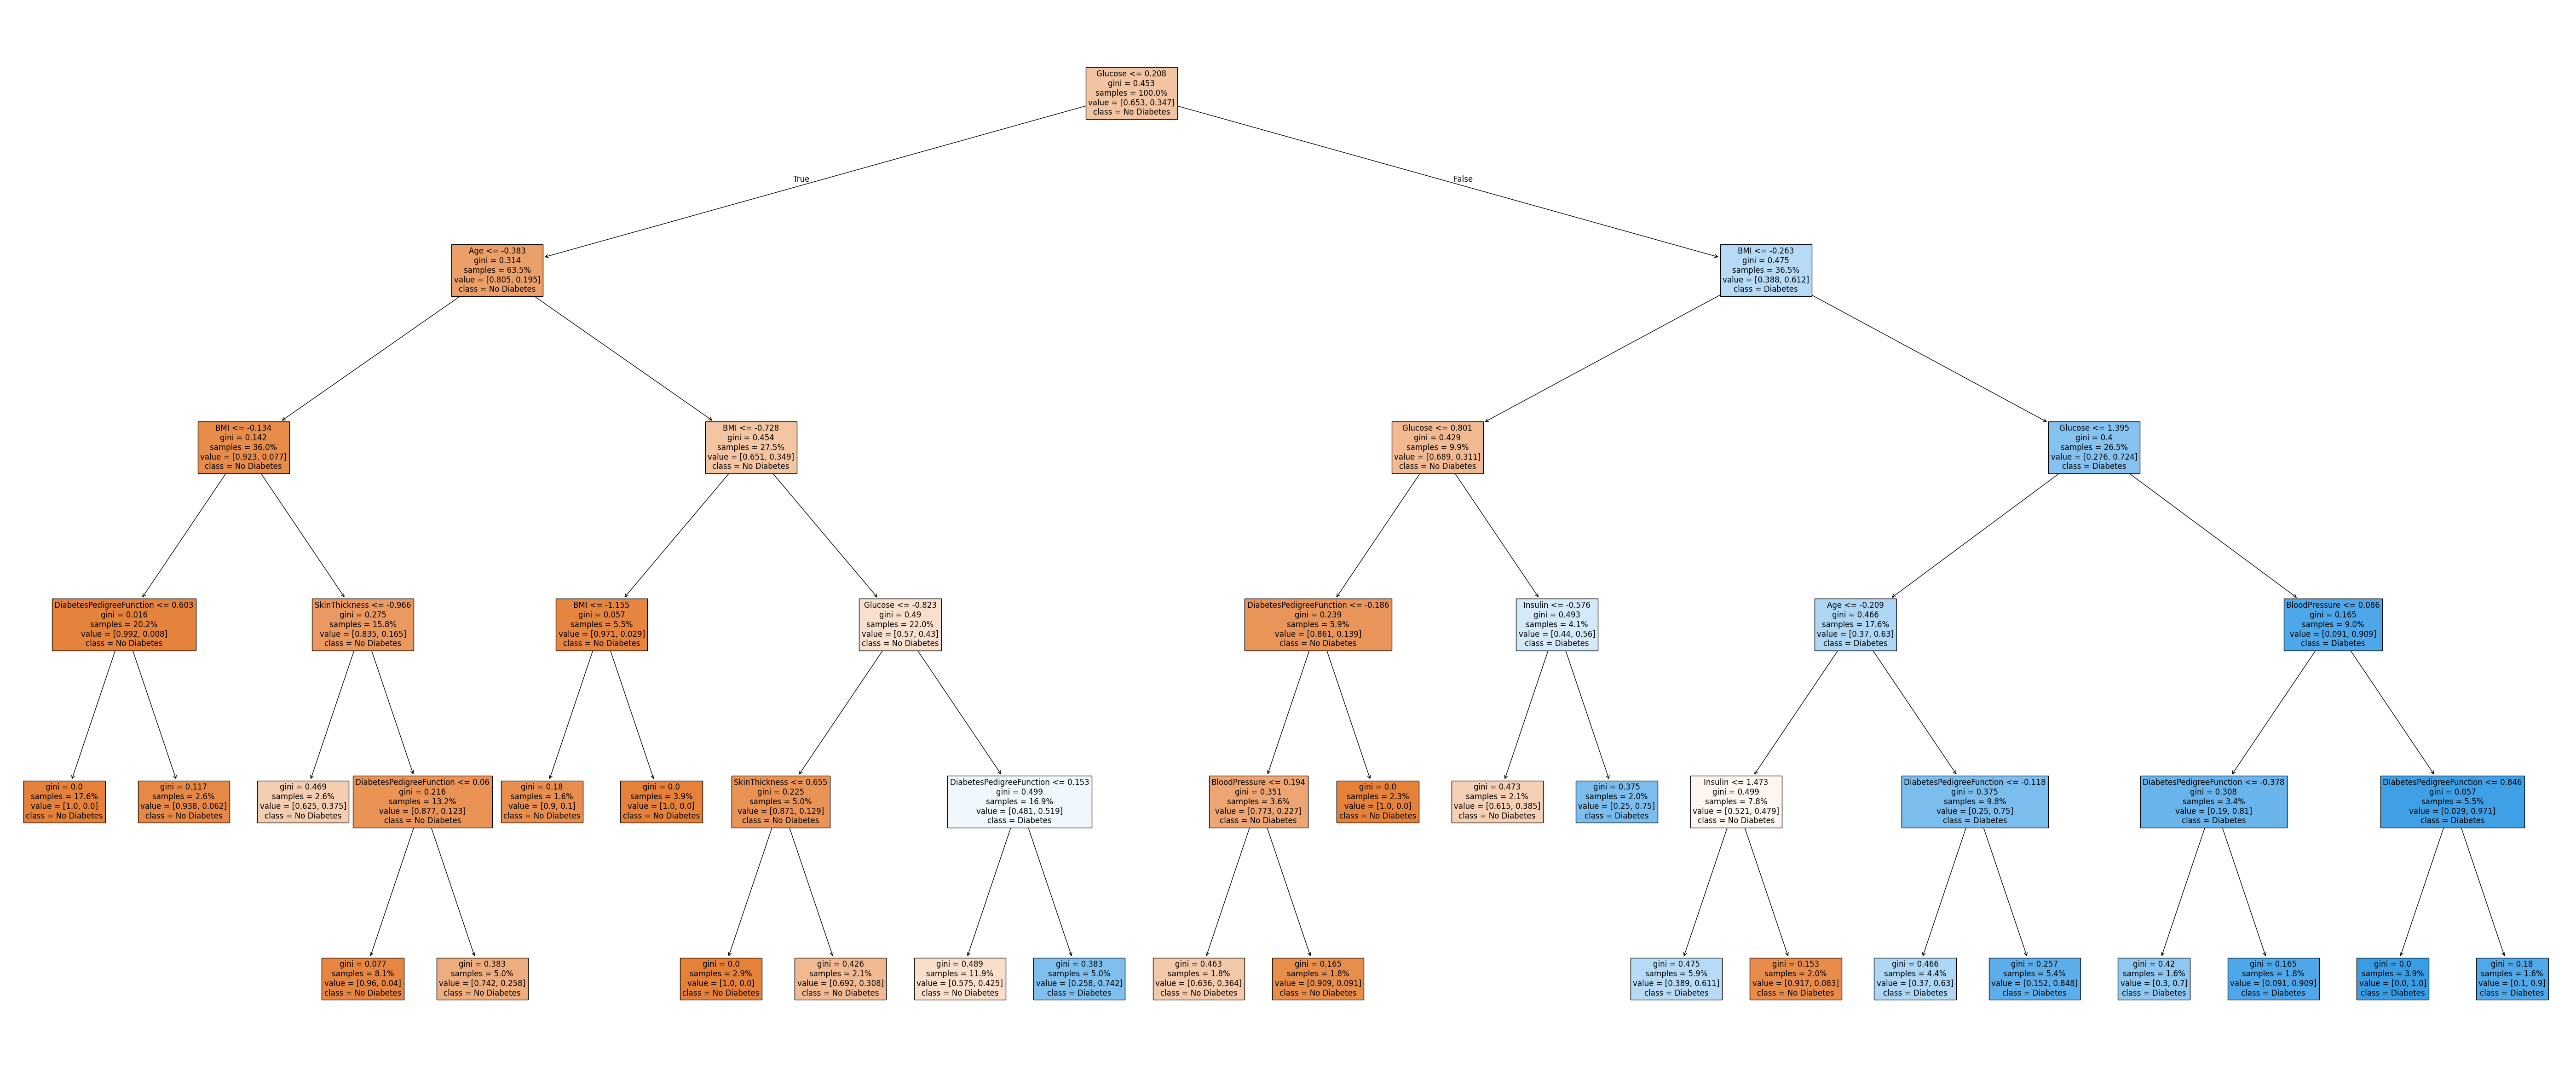

In [161]:
# Árbol final
final_tree = grid_search.best_estimator_
plt.figure(figsize=(72, 30))
plot_tree(final_tree, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, fontsize=12, proportion=True)
plt.show()